#  Build a predictive

Bir teslimat şirketi için tahmini bakım modeli 

<a href="https://drive.google.com/file/d/1shMHPHfnUXzS1XVK3XLB3qOOag-fLQRo/view?usp=drive_link">Dataya Burada Erişebilirsiniz</a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

pd.set_option("display.max_columns",100) #Satır ve sütunların hepsini göstermeye yarıyor

In [2]:
oversample = SMOTE()

In [3]:
df=pd.read_csv("failure.csv")

### EDA

In [4]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [5]:
df.shape

(124494, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [7]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [8]:
df=df.drop("device", axis=1)

In [9]:
df=df.drop("date", axis=1)

In [10]:
df.corr(numeric_only=True)

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
failure,1.000000,0.001984,0.052902,-0.000948,0.067398,0.002270,-0.000550,0.119055,0.119055,0.001622
attribute1,0.001984,1.000000,-0.004248,0.003702,0.001837,-0.003370,-0.001516,0.000151,0.000151,0.001122
attribute2,0.052902,-0.004248,1.000000,-0.002617,0.146593,-0.013999,-0.026350,0.141367,0.141367,-0.002736
attribute3,-0.000948,0.003702,-0.002617,1.000000,0.097452,-0.006696,0.009027,-0.001884,-0.001884,0.532366
attribute4,0.067398,0.001837,0.146593,0.097452,1.000000,-0.009773,0.024870,0.045631,0.045631,0.036069
attribute5,0.002270,-0.003370,-0.013999,-0.006696,-0.009773,1.000000,-0.017051,-0.009384,-0.009384,0.005949
attribute6,-0.000550,-0.001516,-0.026350,0.009027,0.024870,-0.017051,1.000000,-0.012207,-0.012207,0.021152
attribute7,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute8,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute9,0.001622,0.001122,-0.002736,0.532366,0.036069,0.005949,0.021152,0.006861,0.006861,1.000000


<Axes: ylabel='attribute3'>

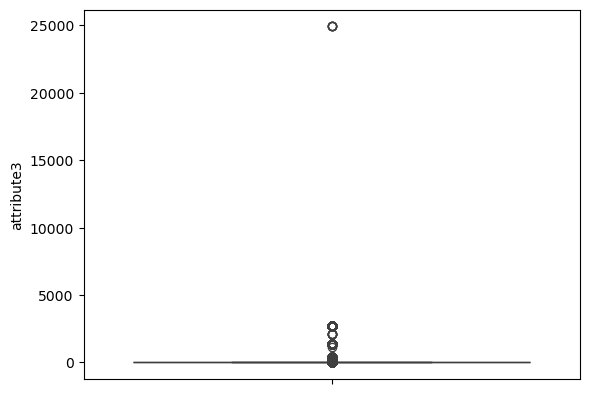

In [11]:
sns.boxplot(df["attribute3"])

<Axes: ylabel='attribute9'>

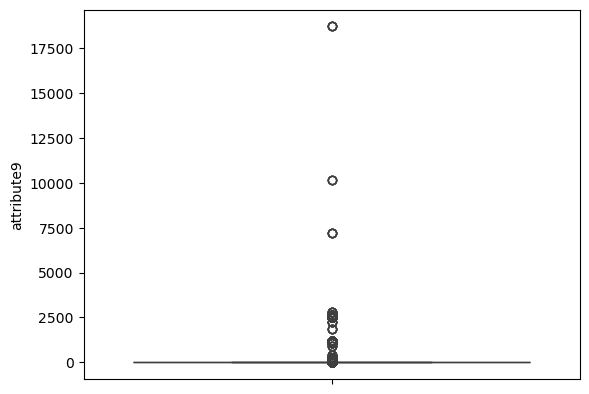

In [12]:
sns.boxplot(df["attribute9"])

<Axes: ylabel='attribute8'>

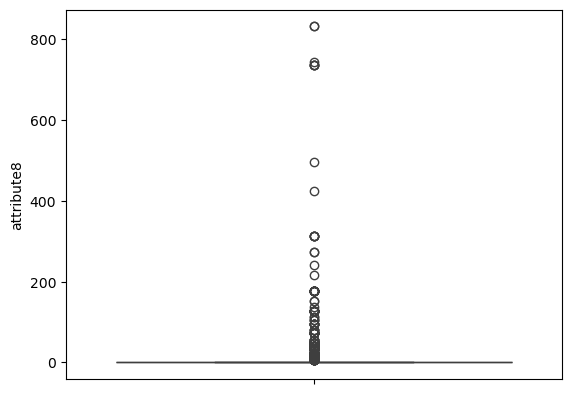

In [13]:
sns.boxplot(df["attribute8"])

<Axes: ylabel='attribute7'>

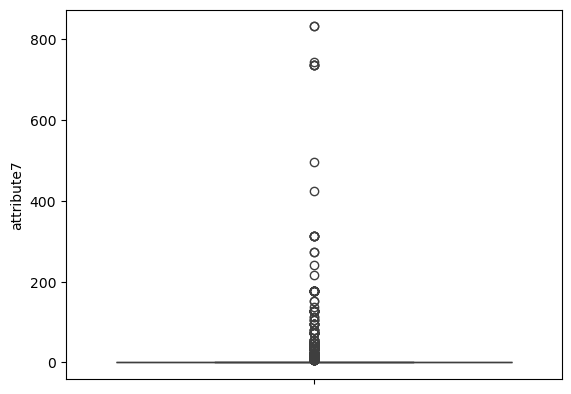

In [14]:
sns.boxplot(df["attribute7"])

### Feature Engineering

In [15]:
df=df[df["attribute7"]< 400 ]

In [16]:
df=df[df["attribute3"]< 5000 ]

In [17]:
df=df[df["attribute9"]< 5000 ]

In [18]:
df["attribute7"].mean()

0.24219296060929854

In [19]:
df["attribute7"].max()

312

In [20]:
df["attribute7"].min()

0

In [21]:
x=df.drop("failure",axis=1)
y=df["failure"]

In [22]:
x, y = oversample.fit_resample(x, y)

### Modelling

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
r=RandomForestClassifier()
d=DecisionTreeClassifier()
k=KNeighborsClassifier()

In [25]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [26]:
tahmind=d.predict(x_test)

In [27]:
accuracy_score(tahmind,y_test)

0.9970853099622096

In [28]:
print(classification_report(tahmind,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24846
           1       1.00      1.00      1.00     24902

    accuracy                           1.00     49748
   macro avg       1.00      1.00      1.00     49748
weighted avg       1.00      1.00      1.00     49748



In [29]:
r.fit(x_train,y_train)

RandomForestClassifier()

In [30]:
tahminr=r.predict(x_test)

In [31]:
accuracy_score(tahminr,y_test)

0.9987336174318565

In [32]:
print(classification_report(tahminr,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24854
           1       1.00      1.00      1.00     24894

    accuracy                           1.00     49748
   macro avg       1.00      1.00      1.00     49748
weighted avg       1.00      1.00      1.00     49748



In [33]:
k.fit(x_train,y_train)

KNeighborsClassifier()

In [34]:
tahmink=k.predict(x_test)

In [35]:
accuracy_score(tahmink,y_test)

0.8454812253758945

In [36]:
print(classification_report(tahmink,y_test))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84     22222
           1       0.90      0.81      0.85     27526

    accuracy                           0.85     49748
   macro avg       0.85      0.85      0.85     49748
weighted avg       0.85      0.85      0.85     49748



In [39]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

def algo_test_classification(X, y):
    # Özellik ölçekleme
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Sınıflandırıcılar
    algos = [
        ('Logistic Regression', LogisticRegression(max_iter=200)),
        ('SVC', SVC()),
        ('KNN', KNeighborsClassifier()),
        ('Decision Tree', DecisionTreeClassifier()),
        ('Random Forest', RandomForestClassifier()),
        ('Gradient Boosting', GradientBoostingClassifier()),
        ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
        ('MLP', MLPClassifier(max_iter=200))
    ]

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    results = []

    for name, algo in algos:
        algo.fit(X_train, y_train)
        y_pred = algo.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        results.append((name, accuracy, precision, recall, f1))

    # Sonuçları DataFrame olarak oluştur
    result_df = pd.DataFrame(results, columns=['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1'])
    return result_df.sort_values('Accuracy', ascending=False)

# Örnek kullanım
# X, y = veri hazırlama fonksiyonunuz
# sonuçlar = algo_test_classification(X, y)
# print(sonuçlar)

In [38]:
algo_test_classification(x, y)

C:\Users\erkan\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:54:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\erkan\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Algoritma,Doğruluk,Hassasiyet,Geri Çağırma,F1
4,Random Forest,0.998734,0.998554,0.998915,0.998734
3,Decision Tree,0.997246,0.996907,0.997588,0.997248
6,XGBoost,0.996120,0.994590,0.997669,0.996127
2,KNN,0.991799,0.985748,0.998030,0.991851
7,MLP,0.962772,0.954199,0.972226,0.963128
5,Gradient Boosting,0.951536,0.953642,0.949234,0.951433
1,SVC,0.904780,0.960073,0.844728,0.898715
0,Logistic Regression,0.822747,0.958859,0.674505,0.791930
